In [23]:

## Predicting Wine Quality ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [24]:
df1 = pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\winequality-red.csv")
df1.shape


(1599, 12)

In [25]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
# Finding out Missing Values
print(df1.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [27]:
# Create Classification version of target variable
df1['goodquality'] = [1 if x >= 7 else 0 for x in df1['quality']]
# Separate feature variables and target variable
X = df1.drop(['quality','goodquality'], axis = 1)
y = df1['goodquality']

In [28]:
# See proportion of good vs bad wines
df1['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [29]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)


In [30]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

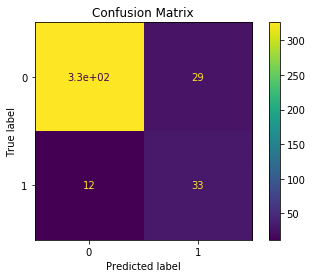

Accuracy:  89.75 %


In [32]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
metrics.plot_confusion_matrix(model1, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred1)*100,"%")

In [33]:
 from sklearn.datasets import load_wine

In [34]:
classifier1 = tree.DecisionTreeClassifier(random_state=0)
df2 = load_wine()

In [35]:
classifier1 = classifier1.fit(df2.data, df2.target)

[Text(1183.9144736842106, 1245.75, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(715.8552631578948, 1019.25, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(440.5263157894737, 792.75, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(220.26315789473685, 566.25, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(110.13157894736842, 339.75, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(330.39473684210526, 339.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(660.7894736842105, 566.25, 'X[9] <= 5.815\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(550.6578947368421, 339.75, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(770.921052631579, 339.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(991.1842105263158, 792.75, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(881.0526315789474, 566.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 

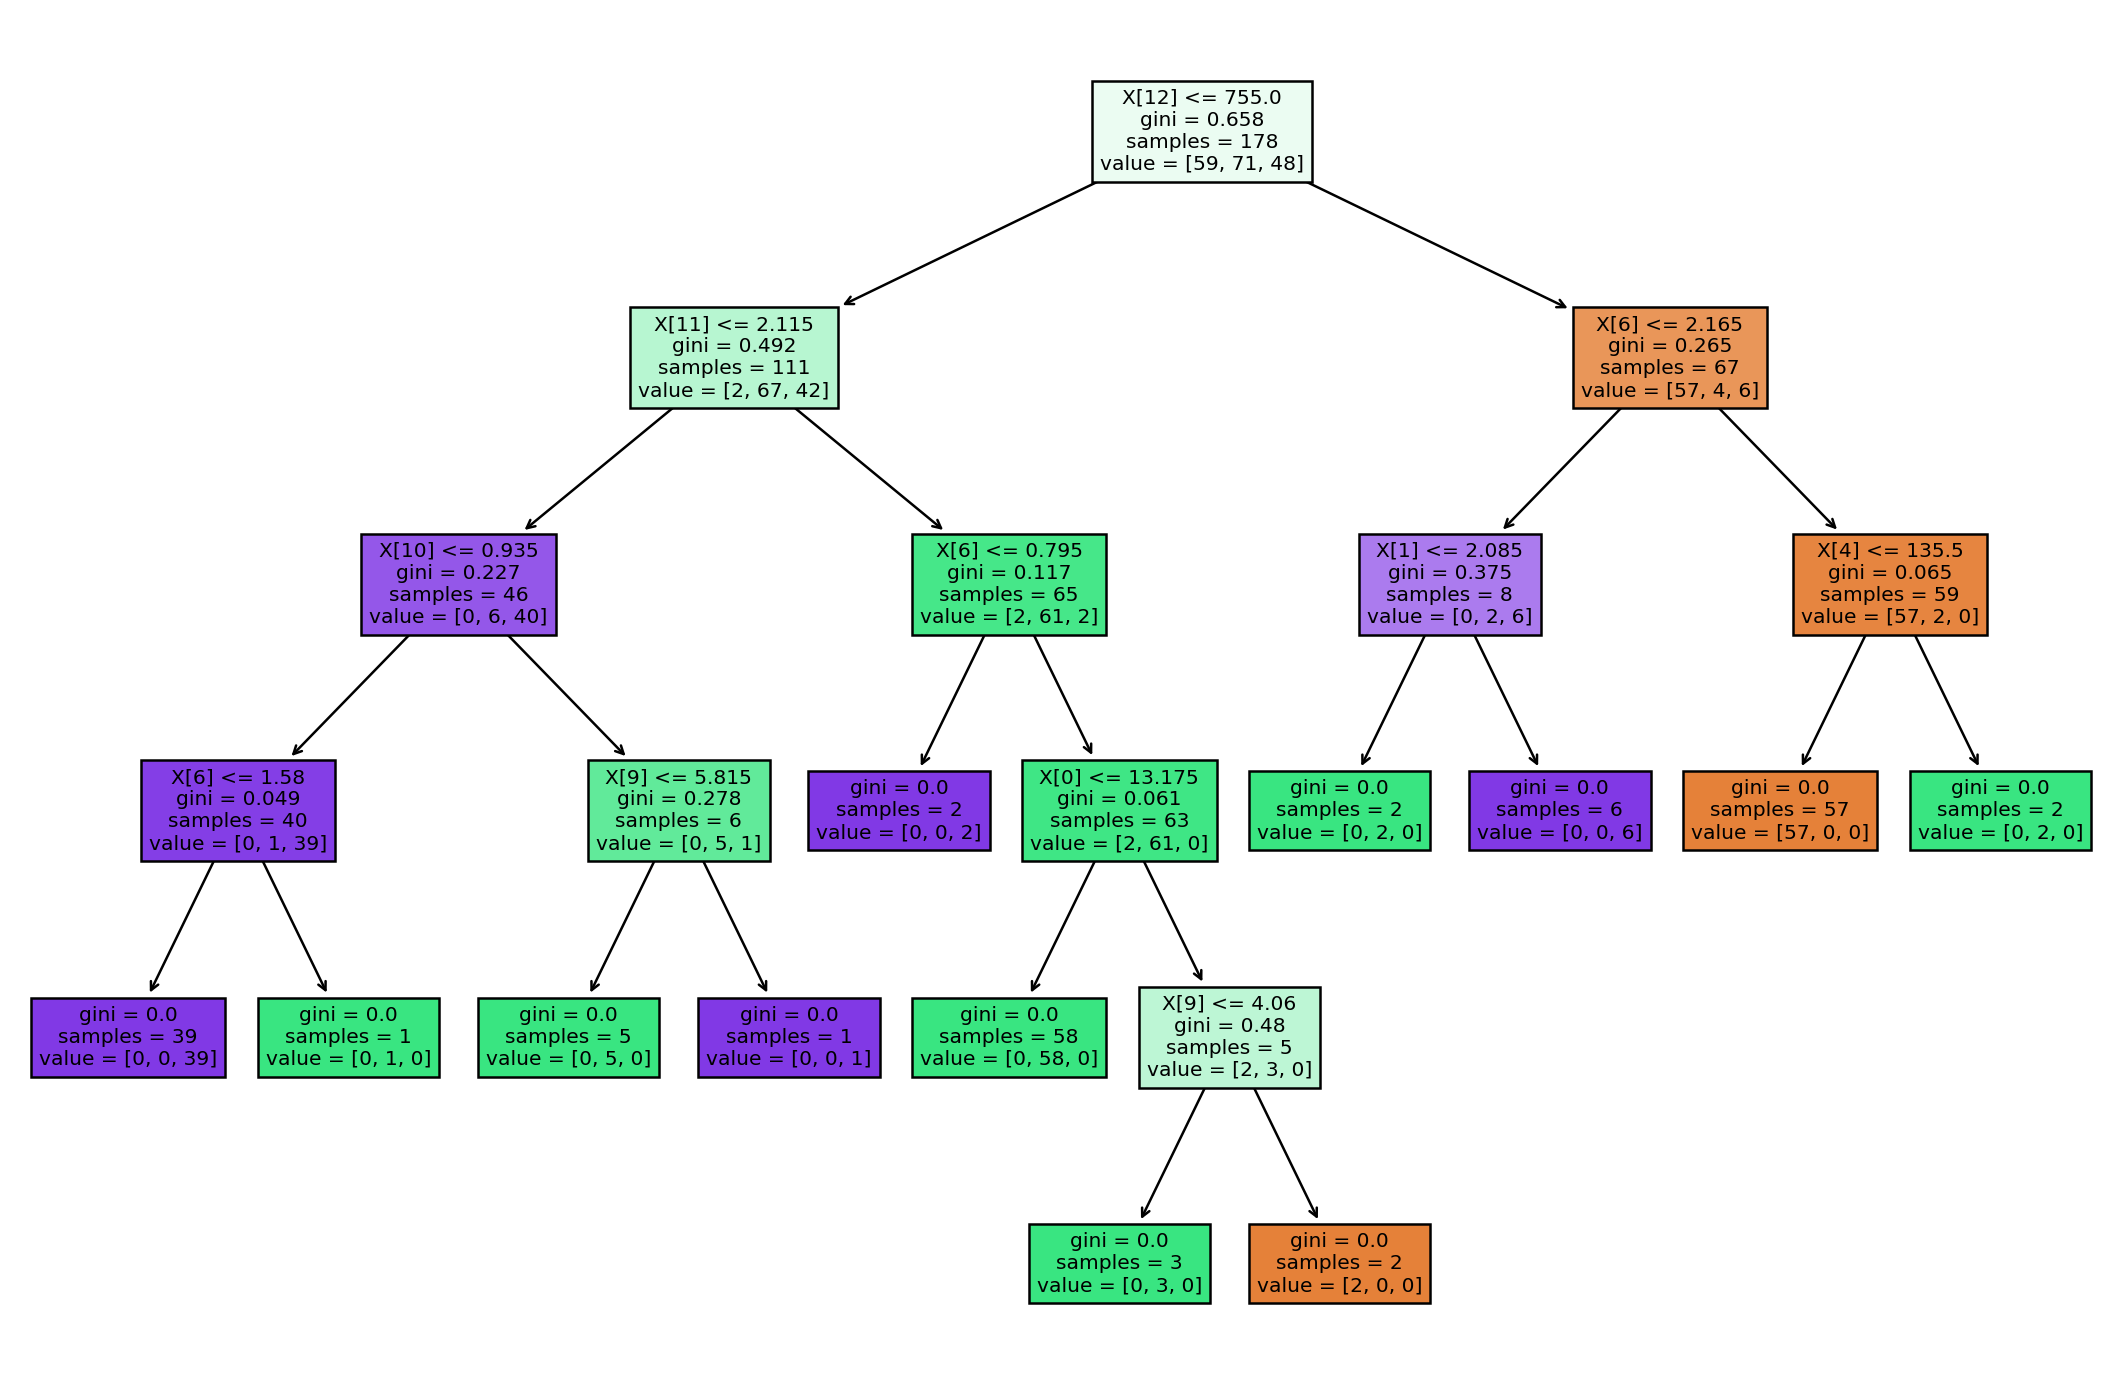

In [36]:
plt.figure(figsize=(15,10),dpi=180)
tree.plot_tree(classifier1,filled='true')